In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1

__Задача:__ предсказание баллов ЕГЭ ученика

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])


SGD (Stochastic gradient descent)

код преподавателя

In [3]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

W = np.random.randn(X.shape[1])

def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        # if i % (iterations / 10) == 0:
            # print(f'Iter: {i}, weights: {W}, error {err}')
    
    # print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W,err

код к ДЗ

In [4]:
%%time
maxl = 2
plot_coeffs_reg = []
for i in np.linspace(0,maxl,1000):
    coeffs,err = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-1, reg=i)
    plot_coeffs_reg.append(np.array([i]+list(coeffs)+[err]))
    print('\r','Выполнено ' + str(round(i/maxl,4)*100)[:4]+'%',end='',flush=True)
plot_coeffs_reg

plot_coeffs_reg = np.array(plot_coeffs_reg)
print('\n',*coeffs,sep='\n')

 Выполнено 100.%

28.25
3.2701480821533613
2.565160431079961
3.0823028836598403
CPU times: user 2min 12s, sys: 2.41 s, total: 2min 15s
Wall time: 2min 12s


Text(0.5, 0, 'Lambda')

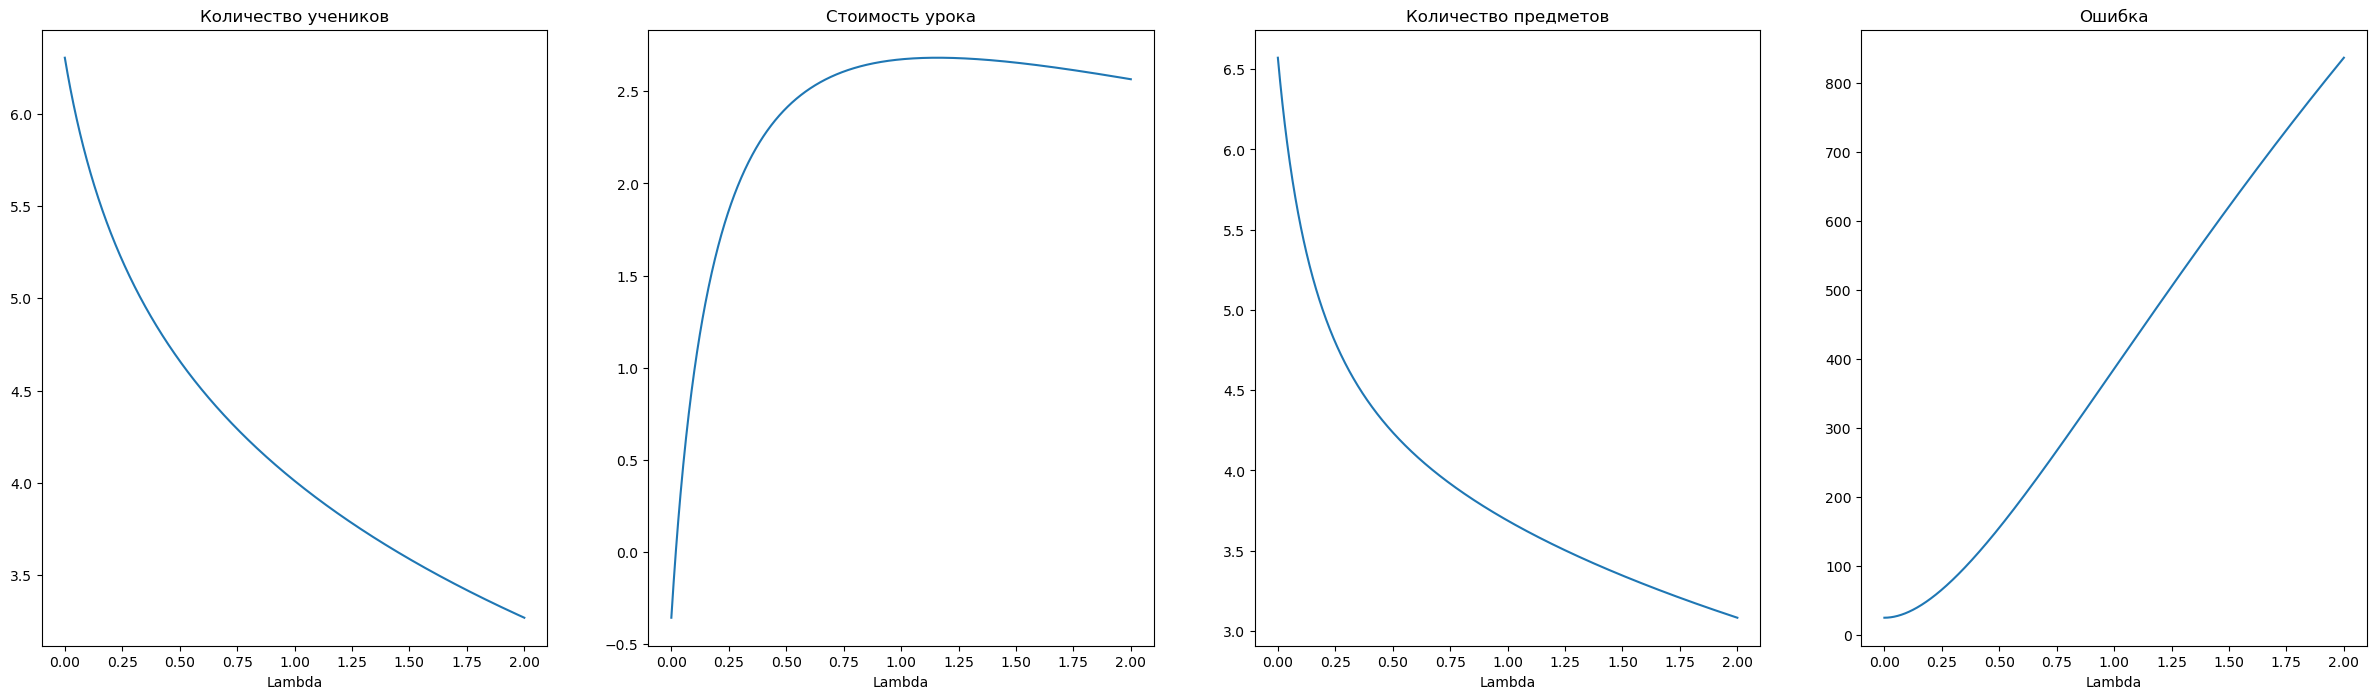

In [5]:
fig,axis = plt.subplots(1,4,figsize=(30,8))
axis[0].plot(plot_coeffs_reg[:,0],plot_coeffs_reg[:,2])
axis[0].set_title('Количество учеников')
axis[0].set_xlabel('Lambda')
axis[1].plot(plot_coeffs_reg[:,0],plot_coeffs_reg[:,3])
axis[1].set_title('Стоимость урока')
axis[1].set_xlabel('Lambda')
axis[2].plot(plot_coeffs_reg[:,0],plot_coeffs_reg[:,4])
axis[2].set_title('Количество предметов')
axis[2].set_xlabel('Lambda')
axis[3].plot(plot_coeffs_reg[:,0],plot_coeffs_reg[:,5])
axis[3].set_title('Ошибка')
axis[3].set_xlabel('Lambda')

In [6]:
# Поиск минимального значения MSE
plot_coeffs_reg[np.argwhere(plot_coeffs_reg[:,5]==np.min(plot_coeffs_reg[:,5]))]

array([[[ 0.        , 56.5       ,  6.30309349, -0.35638885,
          6.57147643, 24.90461888]]])

Вывод: коэффициенты, соответствующие минимальной ошибке получаются при значении Lambda до 0,25, а затем значение MSE значительно растет.

минимальная ошибка получается при Lambda = 0, т.е. в данном случае регуляризация не нужна.

##### R2-метрика

In [7]:
best = np.argwhere(plot_coeffs_reg[:,5]==np.min(plot_coeffs_reg[:,5]))
coeffs = plot_coeffs_reg[best,1:5]
y_pred = X_st @ np.ravel(coeffs)
TTS = np.sum((y - np.mean(y))**2)
RSS = np.sum((y-y_pred)**2)
print('Общее отклонение от среднего = ',TTS,'Сумма отклонений от найденной прамой = ', RSS)
r2 = 1 - (RSS / TTS)
adr2 = 1 - ((1-r2)*9/6)
print(f'R2 = {r2}, adjusted R2 = {adr2}')

Общее отклонение от среднего =  1602.5 Сумма отклонений от найденной прамой =  249.046188769084
R2 = 0.8445889617665623, adjusted R2 = 0.7668834426498434


In [8]:
from sklearn.metrics import r2_score
coeffs = plot_coeffs_reg[best,1:5]
y_pred = X_st @ np.ravel(coeffs)

r2_score(y,y_pred)

0.8445889617665623

In [9]:
import statsmodels.api as sma

# st_obj = sma.add_constant(np.column_stack(X_st))
stats = sma.OLS(y,X_st).fit()
print(stats.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     10.87
Date:                Sun, 05 Feb 2023   Prob (F-statistic):            0.00772
Time:                        00:25:36   Log-Likelihood:                -30.265
No. Observations:                  10   AIC:                             68.53
Df Residuals:                       6   BIC:                             69.74
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.5000      2.037     27.732      0.0

/home/andreyl/Soft/anaconda3/envs/study/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


##### L2 с возведением в квадрат

In [10]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sum(W**2) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        # if i % (iterations / 10) == 0:
            # print(f'Iter: {i}, weights: {W}, error {err}')
    
    # print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W,err

In [11]:
%%time
maxl = 2
plot_coeffs_reg = []
for i in np.linspace(0,maxl,1000):
    coeffs,err = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-1, reg=i)
    plot_coeffs_reg.append(np.array([i]+list(coeffs)+[err]))
    print('\r','Выполнено ' + str(round(i/maxl,4)*100)[:4]+'%',end='',flush=True)
plot_coeffs_reg

plot_coeffs_reg = np.array(plot_coeffs_reg)
print('\n',*coeffs,sep='\n')

 Выполнено 6.31%

/tmp/ipykernel_86536/1542639375.py:2: RuntimeWarning: overflow encountered in square
  err = np.mean((y - y_pred)**2)
/tmp/ipykernel_86536/517905340.py:9: RuntimeWarning: overflow encountered in square
  dReg = reg * np.sum(W**2) # градиент регуляризации


 Выполнено 52.0%

/home/andreyl/Soft/anaconda3/envs/study/lib/python3.10/site-packages/numpy/core/_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/andreyl/Soft/anaconda3/envs/study/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 Выполнено 100.%

nan
nan
nan
nan
CPU times: user 2min 52s, sys: 4.04 s, total: 2min 56s
Wall time: 2min 51s


Text(0.5, 0, 'Lambda')

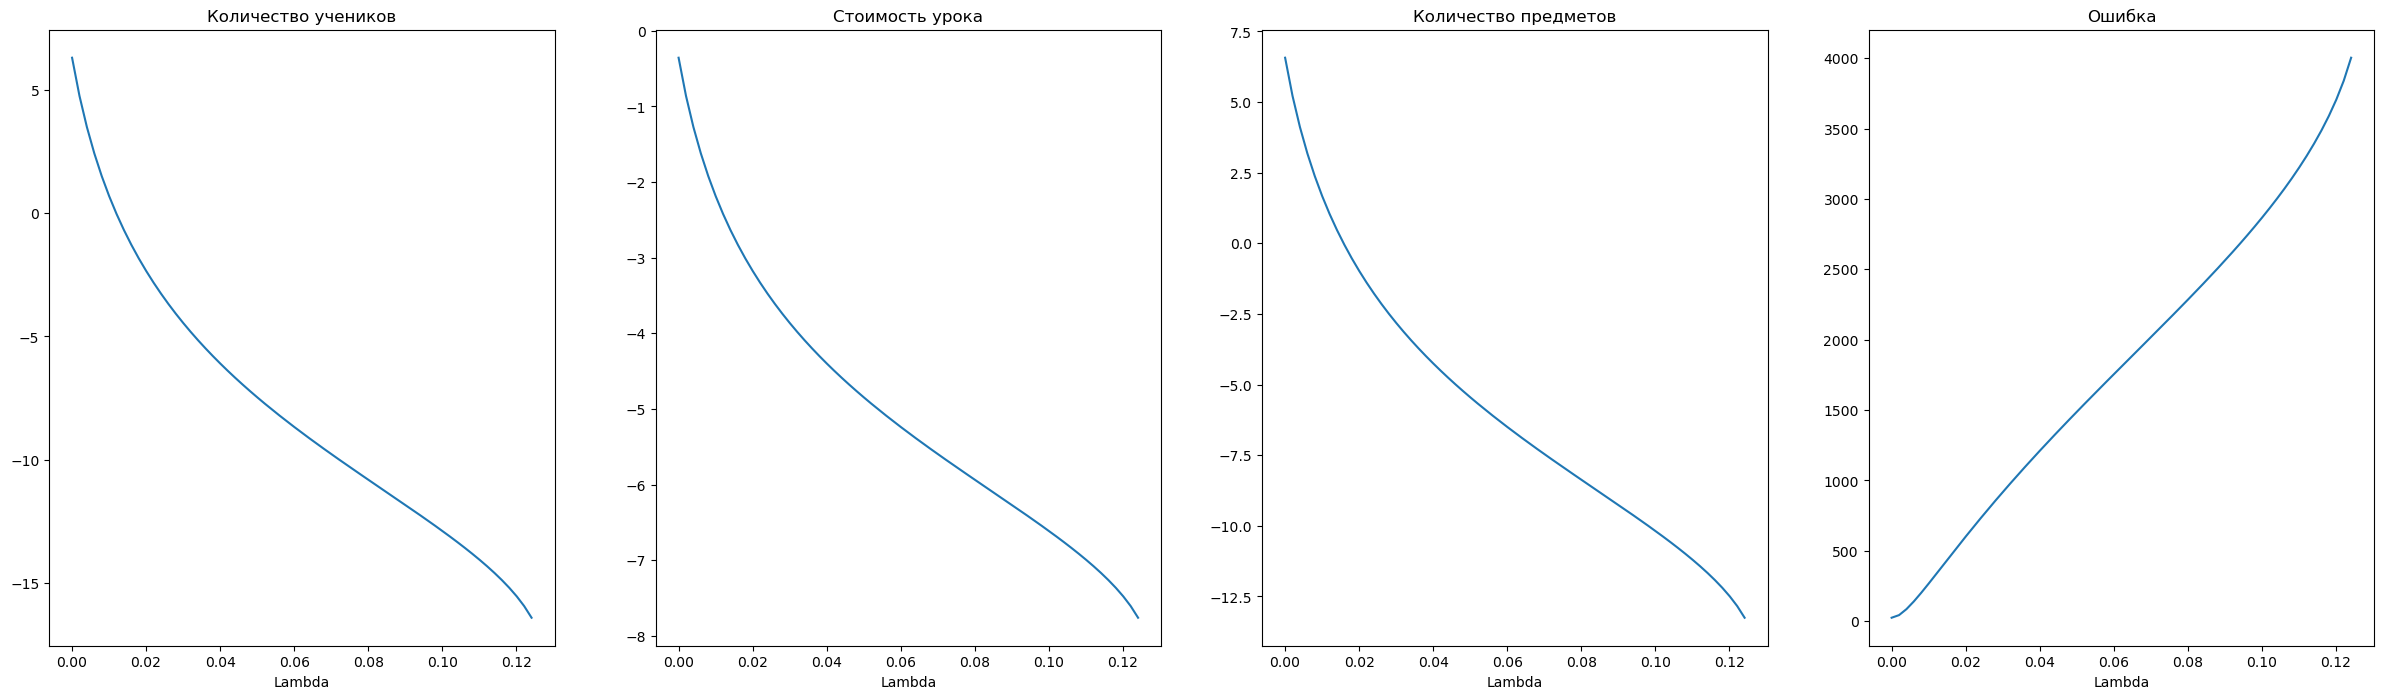

In [12]:
fig,axis = plt.subplots(1,4,figsize=(30,8))
axis[0].plot(plot_coeffs_reg[:,0],plot_coeffs_reg[:,2])
axis[0].set_title('Количество учеников')
axis[0].set_xlabel('Lambda')
axis[1].plot(plot_coeffs_reg[:,0],plot_coeffs_reg[:,3])
axis[1].set_title('Стоимость урока')
axis[1].set_xlabel('Lambda')
axis[2].plot(plot_coeffs_reg[:,0],plot_coeffs_reg[:,4])
axis[2].set_title('Количество предметов')
axis[2].set_xlabel('Lambda')
axis[3].plot(plot_coeffs_reg[:,0],plot_coeffs_reg[:,5])
axis[3].set_title('Ошибка')
axis[3].set_xlabel('Lambda')

In [13]:
# Поиск минимального значения MSE
_min = plot_coeffs_reg[np.ravel(np.argwhere(plot_coeffs_reg[:,5]<10000))]
plot_coeffs_reg[np.argwhere(_min[:,5]==_min[:,5].min())[0][0]]

array([ 0.        , 56.5       ,  6.30309349, -0.35638885,  6.57147643,
       24.90461888])

Вывод: коэффициенты, соответствующие минимальной ошибке получаются при значении Lambda до 0,25, а затем значение MSE значительно растет.

минимальная ошибка получается при Lambda = 0, т.е. в данном случае регуляризация не нужна.

##### R2-метрика

In [14]:
best = np.argwhere(_min[:,5]==_min[:,5].min())[0][0]
coeffs = plot_coeffs_reg[best,1:5]
y_pred = X_st @ np.ravel(coeffs)
TTS = np.sum((y - np.mean(y))**2)
RSS = np.sum((y-y_pred)**2)
print('Общее отклонение от среднего = ',TTS,'Сумма отклонений от найденной прамой = ', RSS)
r2 = 1 - (RSS / TTS)
adr2 = 1 - ((1-r2)*9/6)
print(f'R2 = {r2}, adjusted R2 = {adr2}')

Общее отклонение от среднего =  1602.5 Сумма отклонений от найденной прамой =  249.046188769084
R2 = 0.8445889617665623, adjusted R2 = 0.7668834426498434


In [15]:
from sklearn.metrics import r2_score
coeffs = plot_coeffs_reg[best,1:5]
y_pred = X_st @ np.ravel(coeffs)

r2_score(y,y_pred)

0.8445889617665623

# 2

##### L1

In [16]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sum(abs(W)) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        # if i % (iterations / 10) == 0:
            # print(f'Iter: {i}, weights: {W}, error {err}')
    
    # print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W,err

In [17]:
%%time
maxl = 2
plot_coeffs_reg = []
for i in np.linspace(0,maxl,1000):
    coeffs,err = gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-1, reg=i)
    plot_coeffs_reg.append(np.array([i]+list(coeffs)+[err]))
    print('\r','Выполнено ' + str(round(i/maxl,4)*100)[:4]+'%',end='',flush=True)
plot_coeffs_reg

plot_coeffs_reg = np.array(plot_coeffs_reg)
print('\n',*coeffs,sep='\n')

 Выполнено 100.%

3.8373383661247225
-21.59167279956413
-9.451708557034676
-17.781941911151748
CPU times: user 2min 53s, sys: 4.02 s, total: 2min 57s
Wall time: 2min 52s


Text(0.5, 0, 'Lambda')

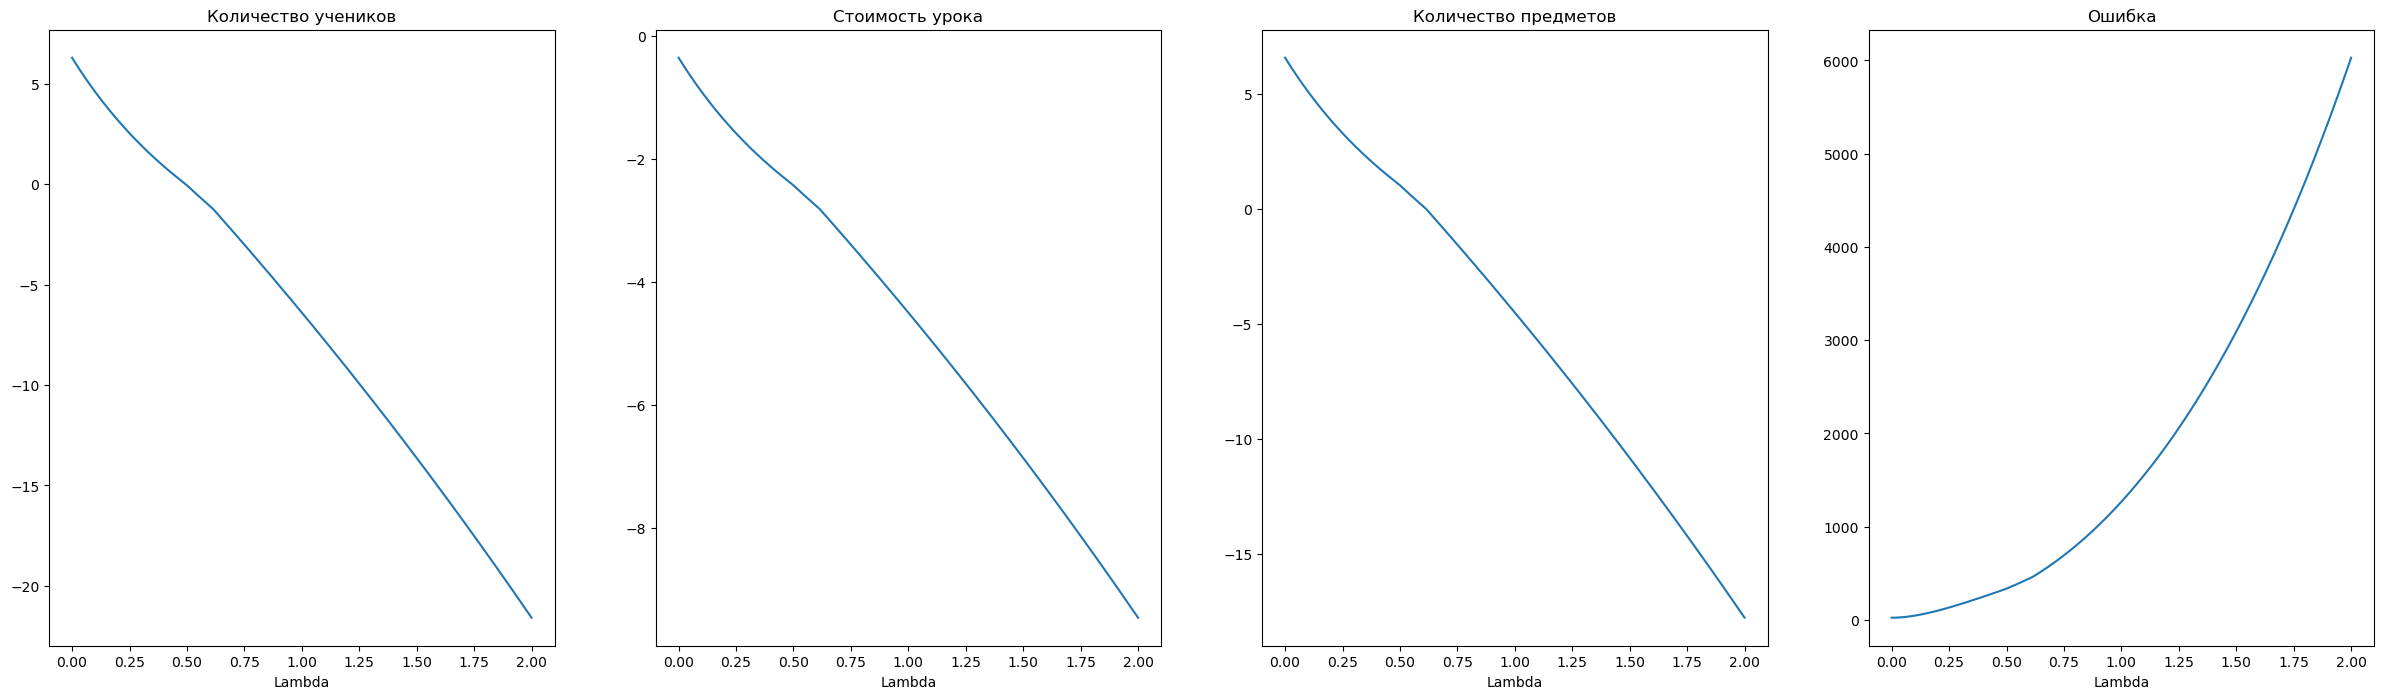

In [18]:
fig,axis = plt.subplots(1,4,figsize=(30,8))
axis[0].plot(plot_coeffs_reg[:,0],plot_coeffs_reg[:,2])
axis[0].set_title('Количество учеников')
axis[0].set_xlabel('Lambda')
axis[1].plot(plot_coeffs_reg[:,0],plot_coeffs_reg[:,3])
axis[1].set_title('Стоимость урока')
axis[1].set_xlabel('Lambda')
axis[2].plot(plot_coeffs_reg[:,0],plot_coeffs_reg[:,4])
axis[2].set_title('Количество предметов')
axis[2].set_xlabel('Lambda')
axis[3].plot(plot_coeffs_reg[:,0],plot_coeffs_reg[:,5])
axis[3].set_title('Ошибка')
axis[3].set_xlabel('Lambda')

In [19]:
# Поиск минимального значения MSE
_min = plot_coeffs_reg[np.ravel(np.argwhere(plot_coeffs_reg[:,5]<10000))]
plot_coeffs_reg[np.argwhere(_min[:,5]==_min[:,5].min())[0][0]]

array([ 0.        , 56.5       ,  6.30309349, -0.35638885,  6.57147643,
       24.90461888])

Вывод: коэффициенты, соответствующие минимальной ошибке получаются при значении Lambda до 0,25, а затем значение MSE значительно растет.

минимальная ошибка получается при Lambda = 0, т.е. в данном случае регуляризация не нужна.

##### R2-метрика

In [20]:
best = np.argwhere(_min[:,5]==_min[:,5].min())[0][0]
coeffs = plot_coeffs_reg[best,1:5]
y_pred = X_st @ np.ravel(coeffs)
TTS = np.sum((y - np.mean(y))**2)
RSS = np.sum((y-y_pred)**2)
print('Общее отклонение от среднего = ',TTS,'Сумма отклонений от найденной прамой = ', RSS)
r2 = 1 - (RSS / TTS)
adr2 = 1 - ((1-r2)*9/6)
print(f'R2 = {r2}, adjusted R2 = {adr2}')

Общее отклонение от среднего =  1602.5 Сумма отклонений от найденной прамой =  249.046188769084
R2 = 0.8445889617665623, adjusted R2 = 0.7668834426498434


In [21]:
from sklearn.metrics import r2_score
coeffs = plot_coeffs_reg[best,1:5]
y_pred = X_st @ np.ravel(coeffs)

r2_score(y,y_pred)

0.8445889617665623

# 3 

Применить нормализацию и стандартизацию одновременно (если дословно) не получится; можно это сделать последовательно, но все зависит от задачи.

При стандартизации легче ответить на вопрос какая доля наблюдений лежит в том или ином диапазоне.

Нормализация пригодится для признаков, в которых имеется "начало" и "конец", например, дни года, время старта.

Формально, ответ на вопрос: да. По сути - надо отталкиваться от вида данных.

# 4

In [24]:
from sklearn.datasets import make_regression
import pandas as pd
samples = make_regression(100,17,n_informative=10)
samples_ = samples
target = samples[1]
samples = pd.DataFrame(samples[0])
samples = samples * np.random.rand(100,17)

In [25]:
w = np.zeros(17)
l_speed = 0.01

stop = 1000
steps = 10000
i = 0
error = np.inf
gd = []
while (error > stop) and (i < steps):
    target_pred = np.dot(samples, w)
    w -= l_speed * (samples.T @ (target_pred-target)) / len(target)
    error_ = np.sum((target - np.dot(samples, w))**2) / len(target)
    if error - error_ < 0.01:
        break
    else:
        i+=1
        error = error_
        gd.append([i,w.values.copy()])


df = pd.DataFrame([np.dot(samples, w),target]).T
df['diff'] = df.diff(axis=1)[1]
df.set_axis(['y_hat','y_true','diff'],axis=1)

,y_hat,y_true,diff
0,87.082455,108.184792,21.102338
1,-254.615610,-241.005549,13.610060
2,-167.338239,20.234786,187.573026
3,40.022576,73.749900,33.727324
4,135.410406,132.570213,-2.840194
...,...,...,...
95,171.592162,143.351583,-28.240579
96,281.992705,372.337883,90.345177
97,-435.197648,-370.904250,64.293398
98,-75.751340,-72.962294,2.789046


In [26]:
# STD разницы между реальным и предсказанным значением
df['diff'].std()

76.7803998458749

In [27]:
# Ошибка (MSE)
error

5843.325372406363

In [28]:
# Шаг, на котором завершена работа алгоритма
i

1950

In [29]:
samples = samples_
target = samples[1]
samples = pd.DataFrame(samples[0])
samples_ = samples.copy()
samples = samples * np.random.rand(100,17)

In [30]:
%%time

n = 35
w = np.zeros(17)
l_speed = 0.01

stop = 1000
steps = 10000
i = 0
error = np.inf
sgd = []
while (error > stop) and (i < steps):
    numbers = np.random.randint(0,samples.shape[0],n)
    target_pred = np.dot(samples.T[numbers].T, w)
    w -= l_speed * (samples.T[numbers] @ (target_pred-target[numbers])) / n
    error_ = np.sum((target - np.dot(samples, w))**2) / n
    if abs(error - error_) < 0.01:
        break
    else:
        i+=1
        error = error_
        sgd.append([i,w.values.copy()])

df = pd.DataFrame([np.dot(samples, w),target]).T
df['diff'] = df.diff(axis=1)[1]
df.set_axis(['y_hat','y_true','diff'],axis=1)

CPU times: user 1.68 s, sys: 15 ms, total: 1.7 s
Wall time: 1.68 s


,y_hat,y_true,diff
0,-18.680212,108.184792,126.865004
1,-127.509001,-241.005549,-113.496548
2,-69.190369,20.234786,89.425156
3,-18.040295,73.749900,91.790195
4,222.872401,132.570213,-90.302188
...,...,...,...
95,7.520469,143.351583,135.831113
96,192.545524,372.337883,179.792358
97,-121.490960,-370.904250,-249.413291
98,-42.359174,-72.962294,-30.603120


In [31]:
df['diff'].std()

83.08285001262566

In [32]:
error

19725.013368094646

In [33]:
error_

19725.011226251136

In [34]:
i

1016

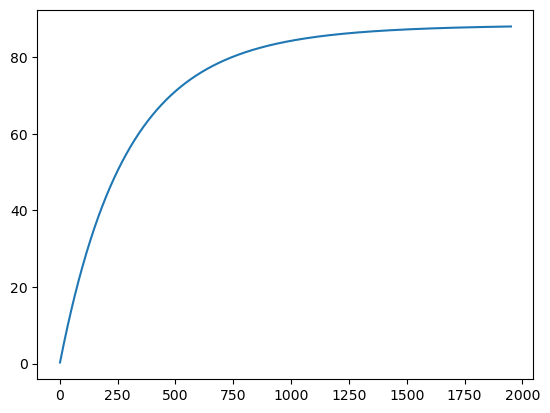

In [37]:
from matplotlib import pyplot as plt

gd = np.array(gd)
plt.plot(gd[:,0],np.column_stack(gd[:,1])[6]);

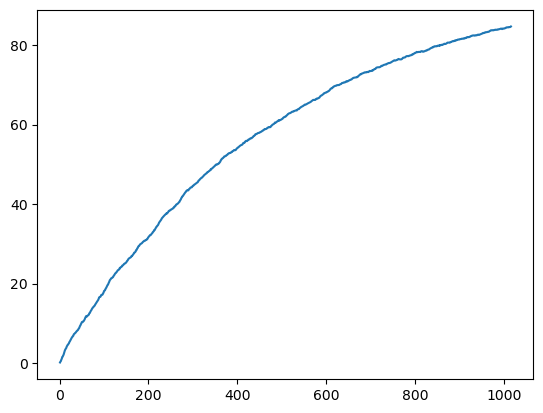

In [38]:
from matplotlib import pyplot as plt

sgd = np.array(sgd)
plt.plot(sgd[:,0],np.column_stack(sgd[:,1])[6]);

На примере первого коэффициента видно, что значения коэффициента значительно менялись;

при этом, модели на разных данных требуется очень разное количество шагов: от 8 сотен, как на данной выборке до 10000. На данной выборке величина ошибки, на которой завершена работа, в несколько раз больше, чем при использовании обычного градиентного спуска.